# Social Network Sites Classification

Meta: Distinguir entre distintas redes sociales

<label>Facebook:</label>
<ul>
    <li>User's <b>Wall</b></li>
    <li>User's <b>Feed</b></li>
    <li>Some one elses <b>Profile</b></li>
    <li>Etc</li>
</ul>


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

Batch Size:

In [10]:
bs = 16

## Dataset

Existe un ejemplo del dataset de mascotas en: <br/>
`/home/jupyter/.fastai/data/oxford-iiit-pet`



### Repositorio del dataset

/home/git/gogs-repositories/socialnetworks/

In [6]:
path = Path('/home/jupyter/data/socialnetworks/')
path_anno = path/'annotations'
path_img = path/'images'
path_img

PosixPath('/home/jupyter/data/socialnetworks/images')

In [7]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/jupyter/data/socialnetworks/images/facebook_profile_5.jpg'),
 PosixPath('/home/jupyter/data/socialnetworks/images/facebook_home_5.jpg'),
 PosixPath('/home/jupyter/data/socialnetworks/images/facebook_home_8.jpg'),
 PosixPath('/home/jupyter/data/socialnetworks/images/facebook_profile_8.jpg'),
 PosixPath('/home/jupyter/data/socialnetworks/images/facebook_profile_6.jpg')]

In [8]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [11]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

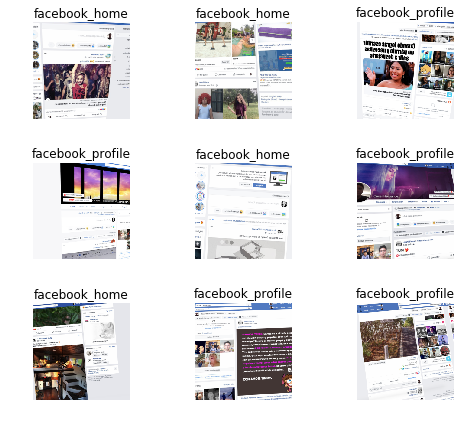

In [12]:
data.show_batch(rows=3, figsize=(7,6))

In [13]:
print(data.classes)
len(data.classes),data.c

['facebook_home', 'facebook_profile']


(2, 2)

## Training

for our training we use the resnet34 architecture as tought by fastai 2019 course

In [15]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [16]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.006266,0.680519,0.250000,00:04
1,1.050373,0.597384,0.500000,00:02
2,1.001072,0.589855,0.250000,00:02
3,0.840237,0.585364,0.250000,00:02


In [18]:
learn.save('stage-1')

## Resultados

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

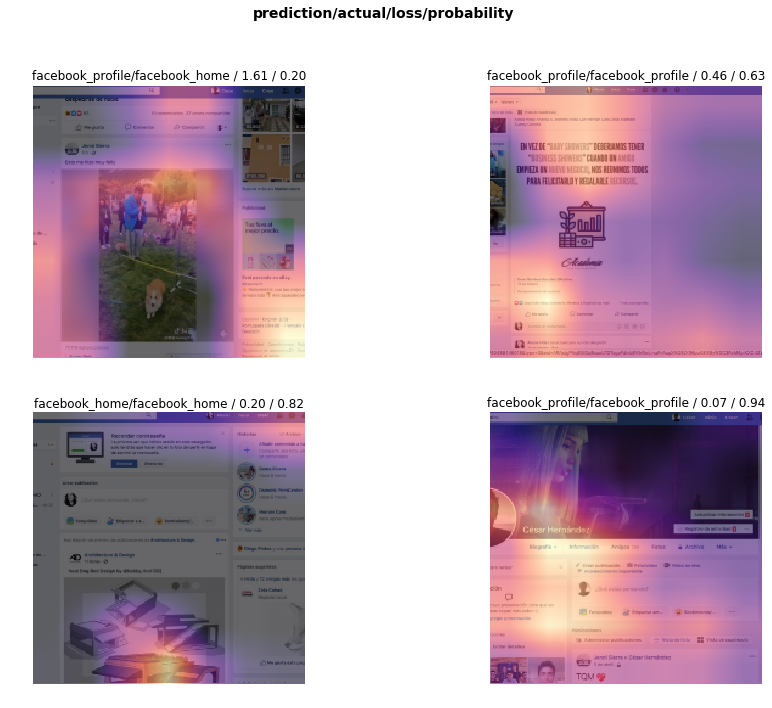

In [27]:
interp.plot_top_losses(4, figsize=(15,11))

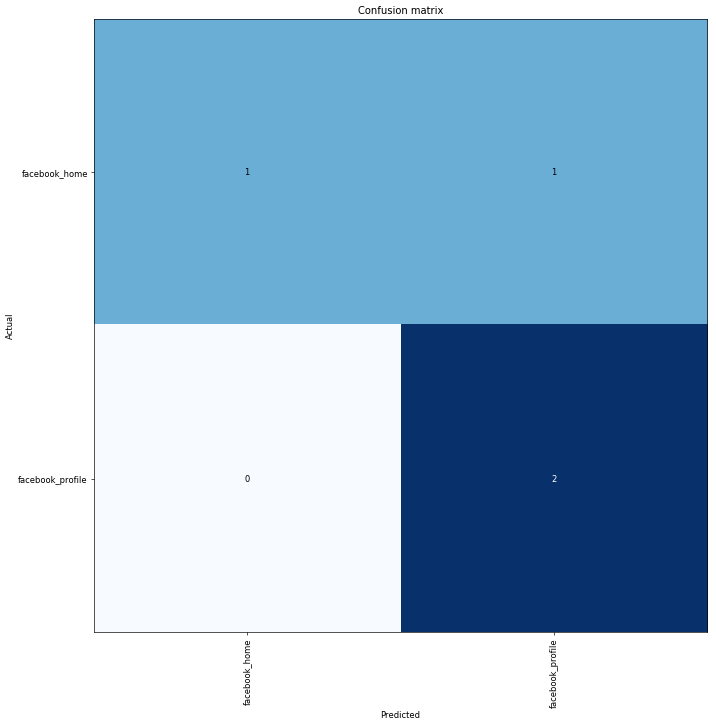

In [29]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [32]:
interp.most_confused(min_val=1)

[('facebook_home', 'facebook_profile', 1)]

## Ajustes

In [33]:
learn.unfreeze()

In [35]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.170931,0.705718,0.250000,00:02
1,0.161558,1.035061,0.500000,00:02
2,0.186442,1.296726,0.500000,00:02


El ratio de errores ha aumentdo, significa que esta todo mal (necesitamos un dataset mas grande!)